In [1]:
import os
import warnings

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

import earthpy as et

warnings.simplefilter('ignore')

In [2]:
# Set working dir
working_dir = os.path.join(et.io.HOME, "desktop", "drought", "data")

# Create path to data
drought_path = os.path.join(working_dir, "drought_monitor", "siskiyou_pct_area_drought.csv")

# Open csv in pandas
df = pd.read_csv(drought_path)

In [3]:
# Set date as datetime object
df.week = pd.to_datetime(df.week)

# Set datetime column as index
df.set_index(df.week, inplace=True)

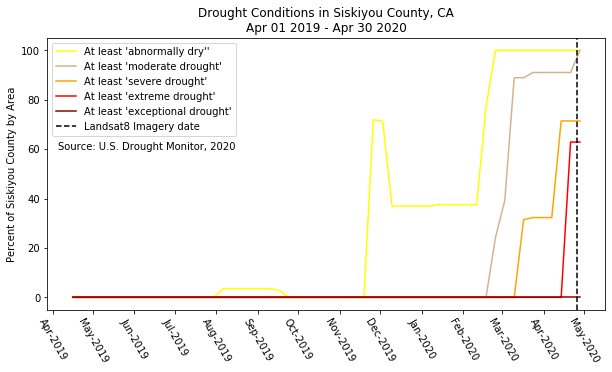

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

# Set time formatting
months = mdates.MonthLocator()

# Set ticks to represent months
ax.xaxis.set_major_locator(months)

# Set format
fmt = mdates.DateFormatter("%b-%Y")

# Pass label format to ax object
ax.xaxis.set_major_formatter(fmt)

# Abnormally dry line
ax.plot(df.index.values, df.d0_d4,
       label="At least \'abnormally dry\''",
       color='yellow')

# Moderate drought line
ax.plot(df.index.values, df.d1_d4,
       label="At least \'moderate drought\'",
       color='tan')

# Severe drought line
ax.plot(df.index.values, df.d2_d4,
       label="At least \'severe drought\'",
       color='orange')

# Extreme drought line
ax.plot(df.index.values, df.d3_d4,
       label="At least \'extreme drought\'",
       color='red')

# Exeptional drought line (no values in time period)
ax.plot(df.index.values, df.d4,
       label="At least \'exceptional drought\'",
       color='darkred')

# Set graph labels and title
ax.set(ylabel="Percent of Siskiyou County by Area",
      title="Drought Conditions in Siskiyou County, CA\n" + 
            "Apr 01 2019 - Apr 30 2020")

# Draw yertical line at landsat image date
ax.axvline(x='2020-04-26', color='black', 
           linestyle='--', label="Landsat8 Imagery date")

# Rotate ticks to avoid overlap
plt.xticks(rotation=-60)

# Add source info
ax.text(0.02, 0.59, transform=ax.transAxes, s="Source: U.S. Drought Monitor, 2020")

# Show legend box
ax.legend()

# Create export path
fig_path = os.path.join(working_dir, "images", "fig_2.png")

# Save figure
plt.savefig(fig_path, bbox_inches="tight")

plt.show()